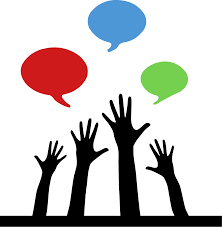

# Author: Lokesh Sharma
The Spark Foundation - Data Science and Business Analytics Internship <br>
(GRIP JANUARY'23)

# Task 1: Prediction using Decision Tree Algorithm
Problem Statement <br>
Create the Decision Tree classifier and visualize it graphically. 


In [34]:
# Importing libraries in Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv("Iris.csv")

In [3]:
# 5 samples of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Exploratory Data Analysis

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
print(df['Species'].nunique())
print(df['Species'].unique())

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Data Visualization

<AxesSubplot:>

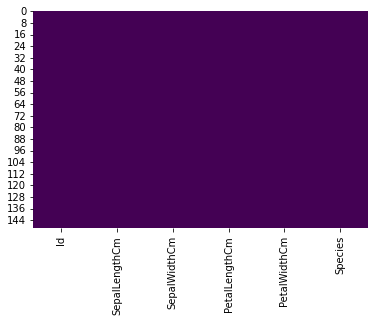

In [12]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Species', ylabel='Count'>

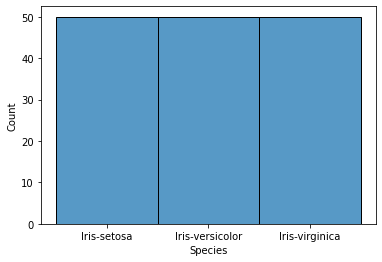

In [13]:
sns.histplot(x='Species',data = df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

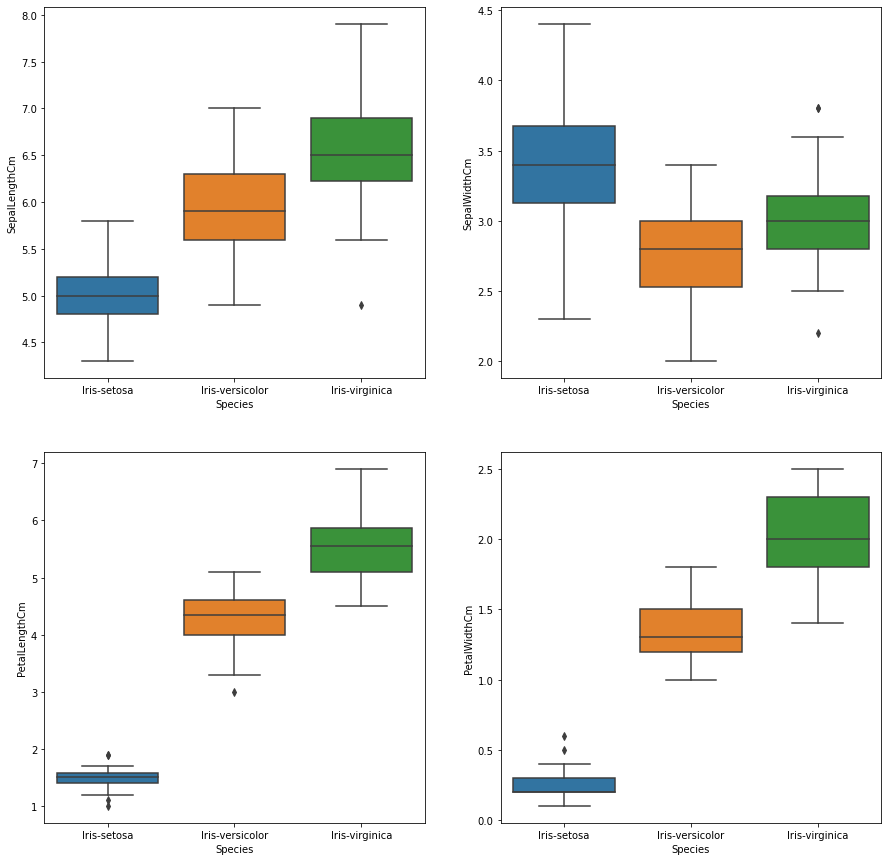

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df, )
plt.subplot(2,2,2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df, )
plt.subplot(2,2,3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df, )
plt.subplot(2,2,4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df, )

<AxesSubplot:>

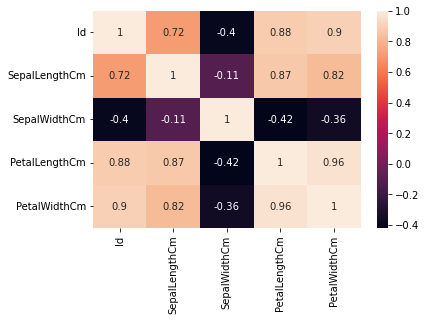

In [15]:
# let;s check correlation
sns.heatmap(df.corr(),annot=True)

Old Shape:  (150, 6)
New Shape:  (146, 6)


<AxesSubplot:xlabel='SepalWidthCm'>

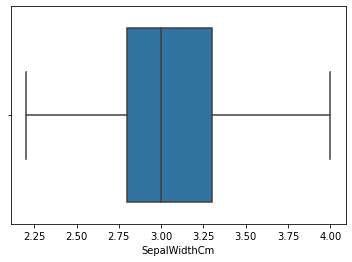

In [16]:
# check the outliers using IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='SepalWidthCm', data=df)

In [17]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Machine Learning  Part

In [18]:
# split dataset into input_feature & target_feature
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

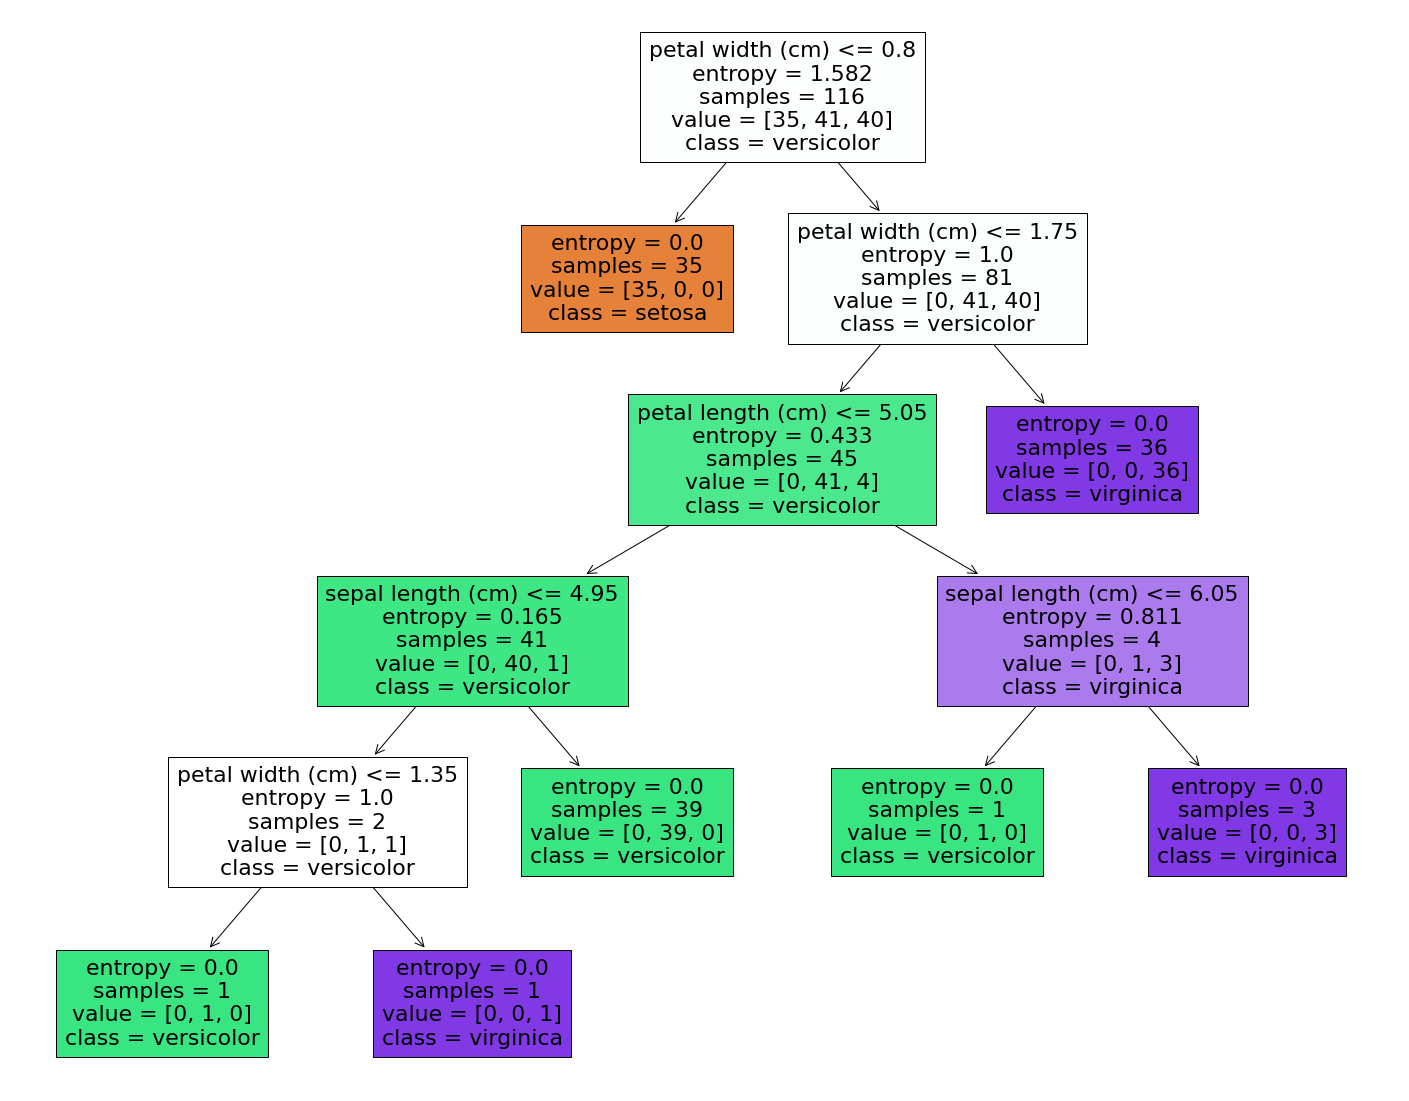

In [41]:
fig = plt.figure(figsize=(25,20))
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Tree.png')

In [22]:
#let's make predictions
y_pred= classifier.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


In [23]:
# check the accuracy 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [24]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [25]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



# Example 1

In [27]:
# now test the model 
# lets take some values as input
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

In [28]:
inputs = np.array([sepal_length,sepal_width,petal_length,petal_width]).reshape(1,4)

In [29]:
prediction = classifier.predict(inputs)

In [30]:
prediction

array(['Iris-setosa'], dtype=object)

here according to our input data it predict as Iris_setosa

# Example 2

In [31]:
#example 2
# lets take some values as input
sepal_length = 6.7
sepal_width = 3.0
petal_length = 5.2
petal_width = 2.3

In [32]:
inputs = np.array([sepal_length,sepal_width,petal_length,petal_width]).reshape(1,4)

In [33]:
prediction = classifier.predict(inputs)
print(prediction)

['Iris-virginica']
